# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Parse the html
html = browser.html
html_soup = soup(html, 'html.parser')
# Find the table
table = html_soup.find('table', class_ = 'table')
curi_hdr = table.find('tr').find_all('th')
#curi_hdr = table.find('th')
curi_data = table.find_all('tr', class_ = 'data-row')

In [5]:
# Extract all rows of data  (Header names and Values)
tabletext = table.text
print(tabletext)



id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181


In [6]:
#Extracting just the header

headers = []
for hdr in curi_hdr:
    headers.append(hdr.text.strip())

# Print column headers
print(headers)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [7]:
#Extracting just the values
curitext = ''
for row in curi_data:
    curitext += row.text + '\n'

print(curitext)





2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
curiosity_readings = []

# Loop through each row in the table
for row in curi_data:
    # Extract the data for each column
    cells = row.find_all('td')
    id = cells[0].text.strip()
    terrestial_date = cells[1].text.strip()
    sol = cells[2].text.strip()
    ls = cells[3].text.strip()
    month = cells[4].text.strip()
    min_temp = cells[5].text.strip()
    pressure = cells[6].text.strip()

    # Create a dictionary for the row
    contents_dict = {
        "id": id,
        "terrestial_date": terrestial_date,
        "sol": sol,
        "ls": ls,
        "month": month,
        "min_temp": min_temp,
        "pressure": pressure
    }

    # Append the row dictionary to the list
    curiosity_readings.append(contents_dict)
print(curiosity_readings)

[{'id': '2', 'terrestial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_curiosity_readings = pd.DataFrame(curiosity_readings)
#df_curiosity_readings = df_curiosity_readings.drop(df_curiosity_readings.columns[0], axis=1)


In [10]:
# Confirm DataFrame was created successfully (see notes for output)
df_curiosity_readings

,id,terrestial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
results = df_curiosity_readings.dtypes
print(results)

id                 object
terrestial_date    object
sol                object
ls                 object
month              object
min_temp           object
pressure           object
dtype: object


In [12]:
# Change data types for data analysis
# THIS METHOD DID NOT WORK, and I don't know why
# So as a workaround I tried uncommented below
#convert_dict = {
#    'id': int,
#    'terrestial_date': pd.to_datetime, 
#    'sol': int,
#    'ls': int,
#    'month': int,
#    'min_temp': float,
#    'pressure': float
#}

#df_type_curiosity = df_curiosity_readings.astype(convert_dict, errors='coerce')
#df_type_curiosity['terrestial_date'] = pd.to_datetime(df_type_curiosity['terrestial_date'], format='%m/%d/%Y')
#print(df_type_curiosity)

# Create a new DataFrame with the desired types
df_type_curiosity = pd.DataFrame({
    'id': df_curiosity_readings['id'].astype(object),
    'terrestial_date': pd.to_datetime(df_curiosity_readings['terrestial_date']),
    'sol': df_curiosity_readings['sol'].astype(int),
    'ls': df_curiosity_readings['ls'].astype(int),
    'month': df_curiosity_readings['month'].astype(int),
    'min_temp': df_curiosity_readings['min_temp'].astype(float),
    'pressure': df_curiosity_readings['pressure'].astype(float)
})

# Print the new DataFrame
print(df_type_curiosity)

        id terrestial_date   sol   ls  month  min_temp  pressure
0        2      2012-08-16    10  155      6     -75.0     739.0
1       13      2012-08-17    11  156      6     -76.0     740.0
2       24      2012-08-18    12  156      6     -76.0     741.0
3       35      2012-08-19    13  157      6     -74.0     732.0
4       46      2012-08-20    14  157      6     -74.0     740.0
...    ...             ...   ...  ...    ...       ...       ...
1862  1889      2018-02-23  1973  133      5     -78.0     730.0
1863  1892      2018-02-24  1974  134      5     -77.0     729.0
1864  1894      2018-02-25  1975  134      5     -76.0     729.0
1865  1893      2018-02-26  1976  135      5     -77.0     728.0
1866  1895      2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [13]:
# Confirm type changes were successful by examining data types again
results_altered = df_type_curiosity.dtypes
print(results_altered)

id                         object
terrestial_date    datetime64[ns]
sol                         int32
ls                          int32
month                       int32
min_temp                  float64
pressure                  float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?

month_counts = df_type_curiosity['month'].value_counts().reset_index()

# Rename the columns for clarity
month_counts.columns = ['month', 'count']

# Sort by the month column
month_counts = month_counts.sort_values('month')

# Print the resulting DataFrame
print(month_counts.to_string(index=False))



 month  count
     1    174
     2    178
     3    192
     4    194
     5    149
     6    147
     7    142
     8    141
     9    134
    10    112
    11    138
    12    166


In [15]:
# 1 continued
# Part 1 outputs what is expected, but is a meaningless list.
# Aren't we really asking how many months in Mars reckoning 
# has Curiosity experienced?
current_month = 13   #we  may start mid year so I am choosing an impossible month
month_count = 0

for index, row in df_type_curiosity.iterrows():
    if row['month'] != current_month:
        current_month = row['month']
        month_count += 1
        


print("Number of Mars Months Curiosity has experienced some of:", month_count)


Number of Mars Months Curiosity has experienced some of: 36


In [16]:
# 2. How many Martian days' worth of data are there?
df_type_curiosity.month.count()

1867

In [17]:
# 3. What is the average low temperature by month?
df_month_avlow = df_type_curiosity.groupby('month')['min_temp'].mean().to_frame().reset_index()

print(df_month_avlow)

    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


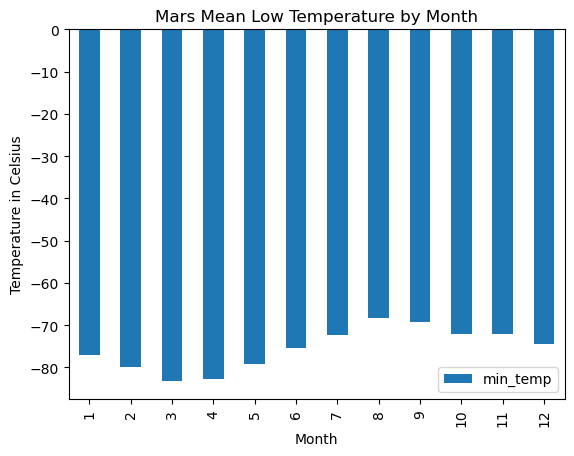

In [18]:
# Plot the average temperature by month

df_month_avlow.plot.bar(x='month', y='min_temp')
plt.title('Mars Mean Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()


In [19]:
# Identify the coldest and hottest months in Curiosity's location
df_hottest_month = df_month_avlow.sort_values(by='min_temp', ascending=True).iloc[0]

# sort the DataFrame by 'avg_min_temp' in descending order to find the coldest month
df_coldest_month = df_month_avlow.sort_values(by='min_temp', ascending=False).iloc[0]

# print the results
print("Curiosity's Hottest month: ", int(df_hottest_month['month']))
print("Curiosity's Coldest month: ", int(df_coldest_month['month']))


Curiosity's Hottest month:  3
Curiosity's Coldest month:  8


In [20]:
# 4. Average pressure by Martian month
df_avg_monpress = df_type_curiosity.groupby('month')['pressure'].mean().to_frame().reset_index()
print(df_avg_monpress)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


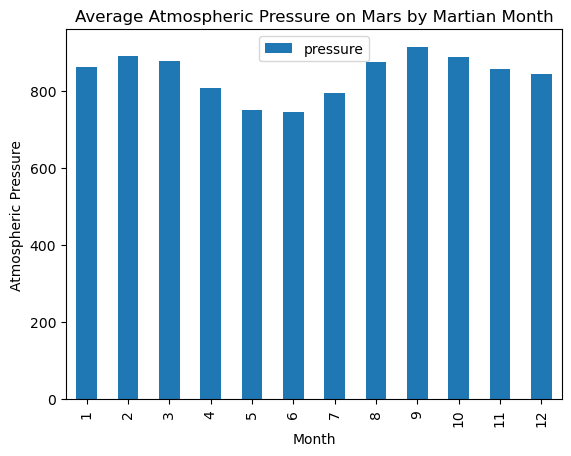

In [21]:
# Plot the average pressure by month
df_avg_monpress.plot.bar(x='month', y='pressure')
plt.title('Average Atmospheric Pressure on Mars by Martian Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

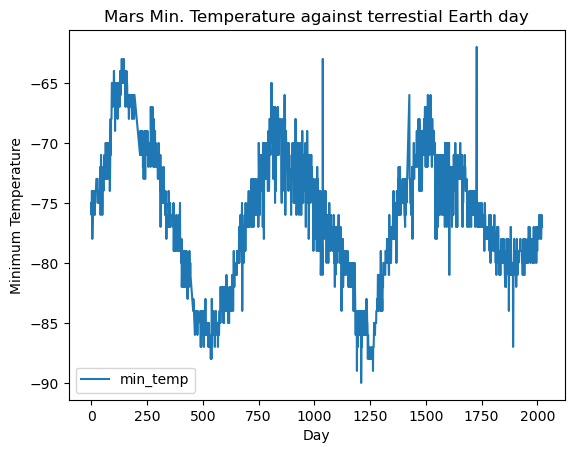

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#df_type_curiosity

# convert the 'date' column to datetime objects

df_type_curiosity['terrestial_date'] = pd.to_datetime(df_type_curiosity['terrestial_date'])

# find the first date in the 'date' column
first_date = df_type_curiosity['terrestial_date'].min()

# create a new column 'days_since_first' with the number of days since the first date
df_type_curiosity['days_since_first'] = (df_type_curiosity['terrestial_date'] - first_date).dt.days

# select only the 'days_since_first' and 'temperature' columns and print the result
df_days_temp = df_type_curiosity[['days_since_first', 'min_temp']]
#print(first_date)
#print(df_days_temp)





df_days_temp.plot.line(x='days_since_first', y='min_temp')
plt.title('Mars Min. Temperature against terrestial Earth day')
plt.xlabel('Day')
plt.ylabel('Minimum Temperature')
plt.show() 
#.plot.line(x='days_since_first', y='min_temp')


In [23]:
# I have modelled a Sine wave to find the terrestial periodicity of temperature
# To see what a Mars year is in Earth days 
def sine_wave(x, amplitude, period, phase, offset):
    return amplitude * np.sin(2 * np.pi * x / period + phase) + offset

# Fit the sine wave to your data
popt, pcov = curve_fit(sine_wave, df_days_temp['days_since_first'], df_days_temp['min_temp'], 
                        bounds=([0, 600, -np.pi, -50], [10, 1000, np.pi, 50]))

# Extract the period from the fit parameters
period = popt[1]
print("Mars year by temperature cycle is of Period: {:.2f} Earth days".format(period))

Mars year by temperature cycle is of Period: 626.33 Earth days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
# Outpout is in the starter code folder
df_type_curiosity.to_csv('./pt2_dfextract.csv', index=False)



In [25]:
browser.quit()